In [55]:

import os
import pandas as pd
import problexity as px
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
name_list=find_the_way('./csvs','.csv')
name_list=[ './csvs\\MB-UDP-1.csv', './csvs\\MB-UDP-2.csv', './csvs\\MB-UDP-3.csv', './csvs\\MB-UDP-4.csv']
cols=features=[ 'pck_size', 'Label']

In [57]:
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

sns.set_style("darkgrid")

In [58]:
#only attacks
for train in name_list:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    df=df[df['Label']==1]
    df = df.sample(n = 1000)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    print(new)

./csvs\MB-UDP-1.csv
{60: 1000}
./csvs\MB-UDP-2.csv
{46: 571, 63: 429}
./csvs\MB-UDP-3.csv
{60: 1000}
./csvs\MB-UDP-4.csv
{46: 553, 63: 447}


In [59]:
for train in name_list:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df=df[df['Label']==1]
    df = df.sample(n = 1000)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    print(new)

./csvs\MB-UDP-1.csv
{40: 3, 52: 7, 60: 967, 64: 4, 123: 1, 135: 1, 175: 1, 922: 1, 1440: 1, 1493: 13, 1500: 1}
./csvs\MB-UDP-2.csv
{40: 25, 46: 216, 48: 40, 52: 80, 60: 31, 63: 172, 64: 19, 68: 26, 72: 4, 74: 1, 77: 2, 78: 1, 83: 1, 91: 1, 98: 1, 117: 1, 121: 1, 123: 1, 147: 1, 178: 1, 195: 1, 199: 1, 200: 1, 203: 2, 205: 1, 213: 2, 214: 1, 222: 1, 230: 1, 242: 3, 252: 1, 258: 1, 278: 1, 314: 1, 317: 2, 318: 1, 322: 1, 326: 1, 334: 1, 450: 2, 543: 1, 550: 1, 574: 1, 616: 1, 686: 1, 702: 1, 714: 2, 757: 1, 774: 1, 826: 1, 958: 1, 978: 1, 979: 1, 1114: 1, 1150: 1, 1230: 1, 1310: 1, 1328: 1, 1402: 1, 1418: 1, 1422: 1, 1440: 5, 1458: 198, 1464: 3, 1480: 2, 1493: 91, 1500: 28}
./csvs\MB-UDP-3.csv
{40: 2, 52: 7, 60: 971, 64: 2, 123: 1, 195: 1, 1493: 15, 1500: 1}
./csvs\MB-UDP-4.csv
{0: 2, 32: 1, 40: 21, 41: 1, 46: 209, 48: 65, 52: 58, 56: 1, 60: 29, 63: 157, 64: 22, 66: 3, 68: 29, 72: 4, 77: 5, 78: 3, 98: 1, 99: 1, 102: 1, 105: 1, 110: 1, 132: 1, 150: 1, 168: 1, 175: 2, 200: 1, 203: 1, 213: 

./csvs\MB-UDP-1.csv


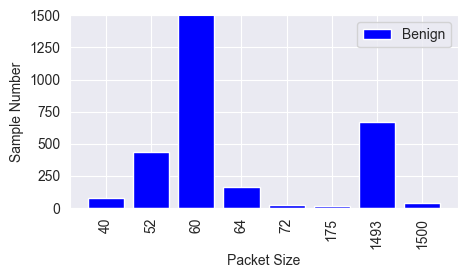

./csvs\MB-UDP-3.csv


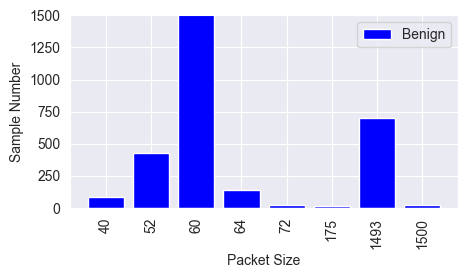

In [60]:
for train in [ './csvs\\MB-UDP-1.csv',  './csvs\\MB-UDP-3.csv']:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #data=df[df['Label']==0]
    df = df.sample(n = 50000,random_state=42)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    counted={}
    for i in new:
        if new[i]>10:# and new[i]<2000:
            counted[str(i)]=new[i]
    langs = counted.keys()
    students = counted.values()
    plt.figure(figsize=(5,2.5))
    ax = plt.subplot(111)
    ax.bar(langs,students,  color='b',label= "Benign")
    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    #plt.xticks(range(1,len(langs),2),rotation=90)
    plt.ylabel("Sample Number")
    plt.xlabel("Packet Size")
    plt.ylim(0,1500)
    plt.savefig(f"{train[:-4]}_B.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


./csvs\MB-UDP-2.csv


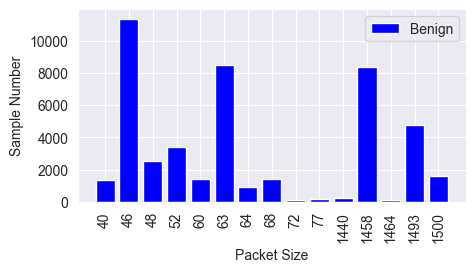

./csvs\MB-UDP-4.csv


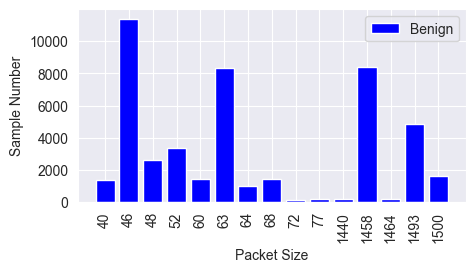

In [61]:
for train in [ './csvs\\MB-UDP-2.csv',  './csvs\\MB-UDP-4.csv']:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #data=df[df['Label']==0]
    df = df.sample(n = 50000,random_state=42)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    counted={}
    for i in new:
        if new[i]>100:# and new[i]<2000:
            counted[str(i)]=new[i]
    langs = counted.keys()
    students = counted.values()
    plt.figure(figsize=(5,2.5))
    ax = plt.subplot(111)
    ax.bar(langs,students,  color='b',label= "Benign")
    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    #plt.xticks(range(1,len(langs),2),rotation=90)
    plt.ylabel("Sample Number")
    plt.xlabel("Packet Size")
    #plt.ylim(0,1500)
    plt.savefig(f"{train[:-4]}_B.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


./csvs\MB-UDP-1.csv


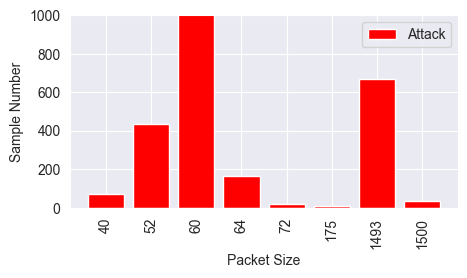

./csvs\MB-UDP-3.csv


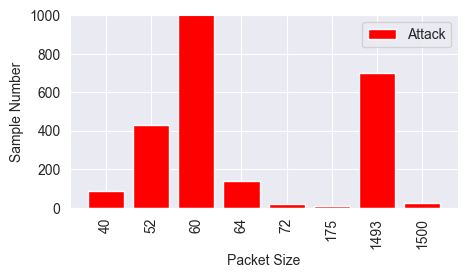

In [62]:
for train in [ './csvs\\MB-UDP-1.csv',  './csvs\\MB-UDP-3.csv']:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #data=df[df['Label']==0]
    df = df.sample(n = 50000,random_state=42)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    counted={}
    for i in new:
        if new[i]>10:# and new[i]<2000:
            counted[str(i)]=new[i]
    langs = counted.keys()
    students = counted.values()
    plt.figure(figsize=(5,2.5))
    ax = plt.subplot(111)
    ax.bar(langs,students,  color='r',label= "Attack")
    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    #plt.xticks(range(1,len(langs),2),rotation=90)
    plt.ylabel("Sample Number")
    plt.xlabel("Packet Size")
    plt.ylim(0,1000)
    plt.savefig(f"{train[:-4]}_A.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


./csvs\MB-UDP-2.csv


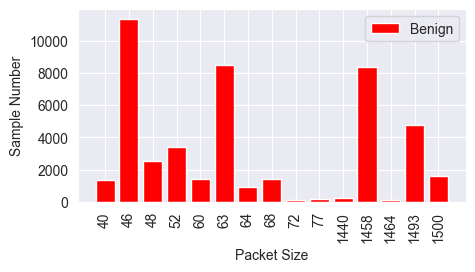

./csvs\MB-UDP-4.csv


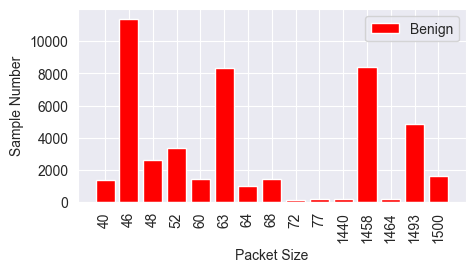

In [63]:
for train in [ './csvs\\MB-UDP-2.csv',  './csvs\\MB-UDP-4.csv']:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #data=df[df['Label']==0]
    df = df.sample(n = 50000,random_state=42)
    new = count_elements(df["pck_size"].values)
    #new={k: v for k, v in sorted(new.items(), key=lambda item: item[1])}
    new=dict(sorted(new.items()))
    counted={}
    for i in new:
        if new[i]>100:# and new[i]<2000:
            counted[str(i)]=new[i]
    langs = counted.keys()
    students = counted.values()
    plt.figure(figsize=(5,2.5))
    ax = plt.subplot(111)
    ax.bar(langs,students,  color='r',label= "Benign")
    plt.legend(numpoints=1)
    plt.xticks(rotation=90) 
    #plt.xticks(range(1,len(langs),2),rotation=90)
    plt.ylabel("Sample Number")
    plt.xlabel("Packet Size")
    #plt.ylim(0,1500)
    plt.savefig(f"{train[:-4]}_A.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


In [10]:
name_list=find_the_way('./csvs','.csv')
name_list=['./csvs\\Kitsune_Mirai_FE.csv',
 './csvs\\Video_Injection.csv']

In [11]:
cols=[ 'ts', 'Label']

./csvs\Kitsune_Mirai_FE.csv
./csvs\Video_Injection.csv


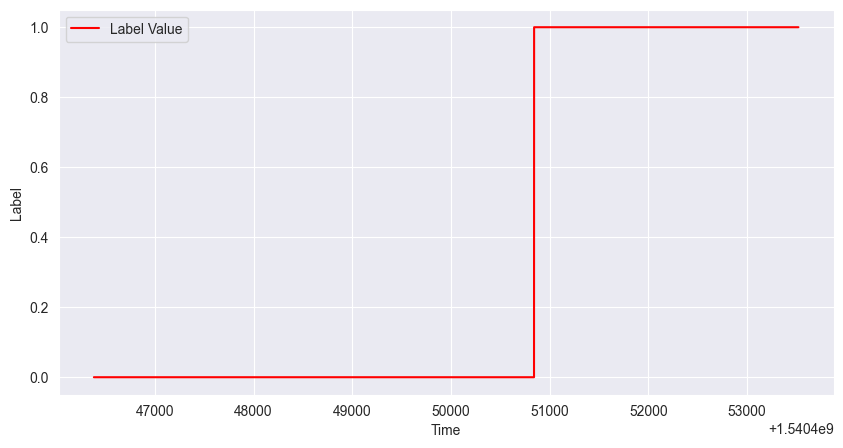

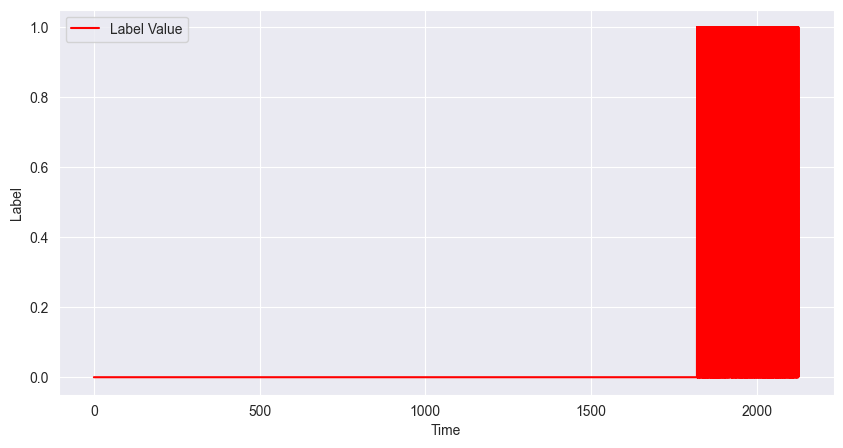

In [12]:
for train in name_list:
    print(train)
    df = pd.read_csv(train,usecols=cols)#,header=None )
    plt.figure(figsize=(10,5))

    sns.set_style("darkgrid")
    graph_name="1.pdf"
    plt.plot( df["ts"].values, df["Label"].values, color='r',label= "Label Value")
    plt.legend(numpoints=1)
    plt.ylabel("Label")
    plt.xlabel("Time")
    plt.savefig(f"{train[:-4]}_time.pdf",bbox_inches='tight',format="pdf")#, dpi=400)


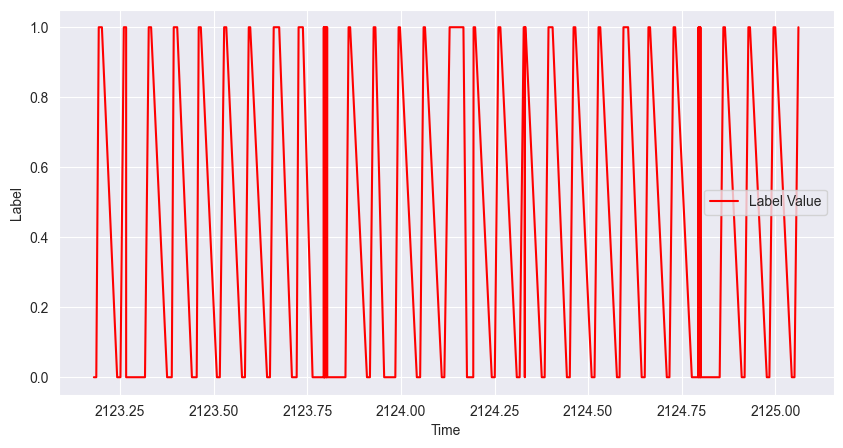

In [13]:
    plt.figure(figsize=(10,5))
    plt.plot( df["ts"].values[-2000:], df["Label"].values[-2000:], color='r',label= "Label Value")
    plt.legend(numpoints=1)
    plt.ylabel("Label")
    plt.xlabel("Time")
    plt.savefig(f"{train[:-4]}_time-gap.pdf",bbox_inches='tight',format="pdf")#, dpi=400)

In [6]:
name_list=find_the_way('./','.csv')
name_list

['./comple.csv',
 './sonuç_size.csv',
 './sonuç_ts.csv',
 './complexity\\sonuç_size.csv',
 './complexity\\sonuç_ts.csv',
 './csvs\\DoS-SYN-1.csv',
 './csvs\\DoS-SYN-2.csv',
 './csvs\\DoS-SYN-3.csv',
 './csvs\\DoS-SYN-4.csv',
 './csvs\\DoS-SYN-5.csv',
 './csvs\\DoS-SYN-6.csv',
 './csvs\\Kitsune_Mirai_FE.csv',
 './csvs\\MB-ACK-1.csv',
 './csvs\\MB-ACK-2.csv',
 './csvs\\MB-ACK-3.csv',
 './csvs\\MB-ACK-4.csv',
 './csvs\\MB-BF-1.csv',
 './csvs\\MB-BF-2.csv',
 './csvs\\MB-BF-3.csv',
 './csvs\\MB-BF-4.csv',
 './csvs\\MB-BF-5.csv',
 './csvs\\MB-HDis-1.csv',
 './csvs\\MB-HDis-2.csv',
 './csvs\\MB-HDis-3.csv',
 './csvs\\MB-HDis-4.csv',
 './csvs\\MB-HDis-5.csv',
 './csvs\\MB-HTTP-1.csv',
 './csvs\\MB-HTTP-2.csv',
 './csvs\\MB-HTTP-3.csv',
 './csvs\\MB-HTTP-4.csv',
 './csvs\\MB-UDP-1.csv',
 './csvs\\MB-UDP-2.csv',
 './csvs\\MB-UDP-3.csv',
 './csvs\\MB-UDP-4.csv',
 './csvs\\MitM-ARP-1.csv',
 './csvs\\MitM-ARP-2.csv',
 './csvs\\MitM-ARP-3.csv',
 './csvs\\MitM-ARP-4.csv',
 './csvs\\MitM-ARP-5.csv',
 

In [ ]:
df = pd.read_csv( './sonuç_size.csv')#,header=None )

In [7]:

df

,names,total,acc,f-score,kappa
0,c_csvs\DoS-SYN-1,0.326886,0.996000,0.996000,0.992000
1,c_csvs\DoS-SYN-2,0.372673,0.986000,0.985997,0.972000
2,c_csvs\DoS-SYN-3,0.313481,0.997000,0.997000,0.994000
3,c_csvs\DoS-SYN-4,0.437505,0.692000,0.659720,0.384000
4,c_csvs\DoS-SYN-5,0.496825,0.535000,0.406717,0.070000
5,c_csvs\DoS-SYN-6,0.500279,0.524000,0.384555,0.048000
6,c_csvs\MB-ACK-1,0.310970,0.966000,0.965961,0.932000
7,c_csvs\MB-ACK-2,0.272492,0.979000,0.978991,0.958000
8,c_csvs\MB-ACK-3,0.293264,0.971000,0.970976,0.942000
9,c_csvs\MB-ACK-4,0.272039,0.972000,0.971978,0.944000


In [28]:
attacks=[]
for i in df.values:
    print(i)
    attacks.append(i[0][7:-2])
attacks=list(set(attacks))
attacks

['c_csvs\\DoS-SYN-1' 0.326886457 0.996 0.995999936 0.992]
['c_csvs\\DoS-SYN-2' 0.372673263 0.986 0.985997255 0.972]
['c_csvs\\DoS-SYN-3' 0.313481296 0.997 0.996999973 0.994]
['c_csvs\\DoS-SYN-4' 0.437505381 0.692 0.659719644 0.384]
['c_csvs\\DoS-SYN-5' 0.496824741 0.535 0.406717489 0.07]
['c_csvs\\DoS-SYN-6' 0.500279341 0.524 0.384554914 0.048]
['c_csvs\\MB-ACK-1' 0.310970317 0.966 0.965960651 0.932]
['c_csvs\\MB-ACK-2' 0.272492421 0.979 0.978990735 0.958]
['c_csvs\\MB-ACK-3' 0.293264418 0.971 0.97097559 0.942]
['c_csvs\\MB-ACK-4' 0.272039401 0.972 0.971978031 0.944]
['c_csvs\\MB-BF-1' 0.323248775 0.960884354 0.918095434 0.836358356]
['c_csvs\\MB-BF-2' 0.405097523 0.959252971 0.922710174 0.845450769]
['c_csvs\\MB-BF-3' 0.353049018 0.956 0.950248756 0.900502513]
['c_csvs\\MB-BF-4' 0.353870912 0.896153846 0.890243712 0.781065909]
['c_csvs\\MB-BF-5' 0.353210294 0.91005291 0.901225839 0.80257458]
['c_csvs\\MB-HDis-1' 0.270430972 0.998204668 0.995151673 0.990303431]
['c_csvs\\MB-HDis-2' 0.2

['Scan-OS',
 'Scan-HDis',
 'MB-HDis',
 'Scan-Port',
 'SPScan-Port',
 'MB-BF',
 'MB-HTTP',
 'DoS-SYN',
 'MB-UDP',
 'MB-ACK',
 'MitM-ARP']

In [37]:
colors={'Scan-OS':'blue',
 'Scan-HDis':'orange',
 'MB-HDis':'green',
 'Scan-Port': 'red',
 'SPScan-Port':'purple',
 'MB-BF':'brown',
 'MB-HTTP':'pink',
 'DoS-SYN':'gray',
 'MB-UDP':'olive',
 'MB-ACK':'cyan',
 'MitM-ARP':'gold'}

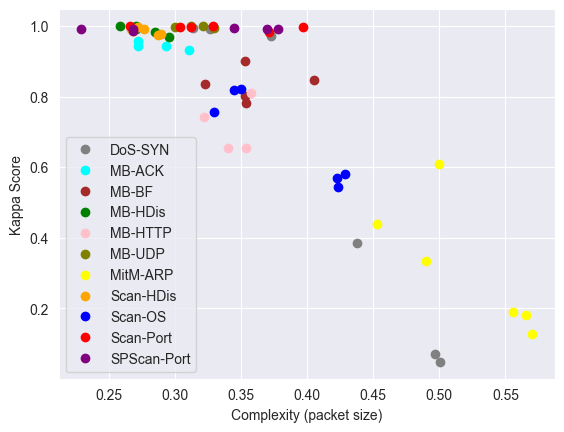

In [39]:
df = pd.read_csv( './sonuç_size.csv')#,header=None )
attacks=[]
for i in df.values: 
    if i[0][7:-2] not in attacks:
        attacks.append(i[0][7:-2])
        plt.plot(i[1], i[4], "o",color=colors[i[0][7:-2]], label=i[0][7:-2])
    else:
        plt.plot(i[1], i[4], "o",color=colors[i[0][7:-2]] )
plt.legend(numpoints=1)
plt.ylabel("Kappa Score")
plt.xlabel("Complexity (packet size)")
plt.savefig(f"Complexity (packet size).pdf",bbox_inches='tight',format="pdf")#, dpi=400)